## You've been doged.


Ce Notebook ajoute un user au groupe Doge (dont il ne peut pas s'échapper) puis change les miniatures de tous ses items par une photo du **Doge**

Attention avant de l'utiliser, le doging n'est pas totalement réversible

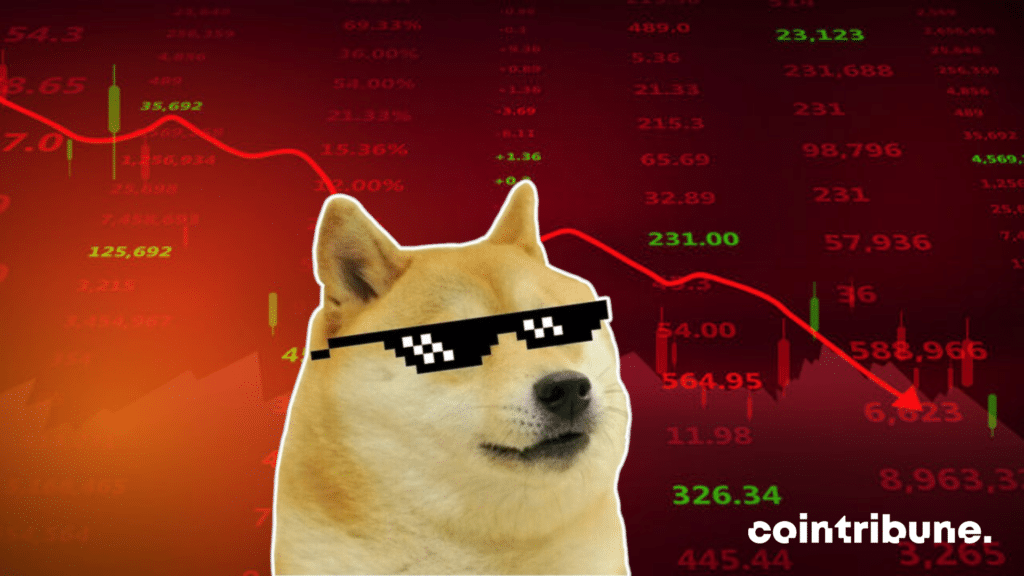

#### Connexion au GIS

In [ ]:
from arcgis.gis import GIS
gis = GIS("home")

#### Choix de la victime

In [ ]:
user = gis.users.search(query="username:nom_utilisateur")###changer le nom d'utilisateur
user[0]

#### Ajout de la victime au Dogegroup

Vous devez avoir créé un groupe Dogegroup en amont (veillez à activer l'option ne permettant pas aux membres du groupe de quitter celui-ci). Notez que vous pouvez créer des groupes via l'API, exemple dans [ce notebook](https://github.com/JapaLenos/Python-in-ArcGIS/blob/main/Portal_administration/ContentAdmin_LayerView_ShareInGroups_AddUsersToGroup.ipynb)

In [ ]:
dogegroup = gis.groups.search('title:Dogegroup')
dogegroup[0]

In [ ]:
dogegroup[0].add_users(user[0])

#### Doging

In [ ]:
members = dogegroup[0].get_members()
todoge = members['users']
[todoge]

Remarque : en plus de votre victime, tous les membres déjà présents dans le dogegroup se referont doger

In [ ]:
for user in todoge :
    content = gis.content.search(query="owner:"+user, max_items=200)
    for item in content :
        if thumbnail != "thumbnail/breed-doge-main.jpg": 
            item.update(thumbnail=r"/arcgis/home/Doge/breed-doge-main.jpg")#fichier local

Cette cellule prend potentiellement très longtemps à tourner car s'il y a beaucoup d'utilisateurs à doger ce script est débile

#### Notif à la victime

In [ ]:
gis.users.send_notification(todoge, "You've been doged","unlucky you","email")

#### Undoging

In [ ]:
dogedcontent=[]
for user in todoge :
    content = gis.content.search(query="owner:"+todoge, max_items=200)
    for item in content :
        if item.thumbnail == "thumbnail/breed-doge-main.jpg":
            try :
                item.create_thumbnail(update=True)
            except:
                dogedcontent.append(item)

In [ ]:
for item in dogedcontent :
    if item.type == "StoryMap":
        item.update(thumbnail=r"/arcgis/home/Doge/storymaps-bg-2.jpg")
    elif item.type == "Dashboard":
        item.update(thumbnail=r'/arcgis/home/Doge/arcgis-dashboard-banner-fg.jpg')
    elif item.type == "Form":
        item.update(thumbnail=r'/arcgis/home/Doge/survey.jpg')
    elif item.type == "Web Experience":
        item.update(thumbnail=r'/arcgis/home/Doge/exb.png')
    elif item.type == "Web Mapping Application":
        item.update(thumbnail=r'/arcgis/home/Doge/banner-screens-web-app-builder.jpg')
    else :
        item.update(thumbnail=r'/arcgis/home/Doge/banner-default.png')